In [ ]:
# I am building the my webscrape off of this person's excellent documentation with 
# some slight modifcations. 
# https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

In [166]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

#import to make that html 'soviet-code' readable
import pprint

# ?
import re

#import to get the universe in balance
import random

# ?
from scipy.stats import binom

# Because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#get the first page of the Austin motorcycle prices
#I also messed with the url to bundle duplicates and assign the url to land on front page 
response = requests.get('https://austin.craigslist.org/search/mca?s=0&bundleDuplicates=1')

In [ ]:
# 

In [3]:
html_soup = BeautifulSoup(response.text, 'html.parser')

posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 120 (elements/page)

<class 'bs4.element.ResultSet'>
127


In [4]:
# All my datatypes are bs4 which is what I want
# I got 127. I'm not sure how, but I would be more concerned if it were less than 120

In [5]:
# Now to get a quick check on what's inside our response
pprint.pprint(response.text)

('\ufeff<!DOCTYPE html>\n'
 '<html class="no-js"><head>\n'
 '    <title>austin motorcycles/scooters  - craigslist</title>\n'
 '\n'
 '    <meta name="description" content="austin motorcycles/scooters  - '
 'craigslist">\n'
 '    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>\n'
 '    <link rel="canonical" href="https://austin.craigslist.org/search/mca">\n'
 '    <link rel="alternate" type="application/rss+xml" '
 'href="https://austin.craigslist.org/search/mca?bundleDuplicates=1&amp;format=rss" '
 'title="RSS feed for craigslist | austin motorcycles/scooters  - '
 'craigslist">\n'
 '        <link rel="next" '
 'href="https://austin.craigslist.org/search/mca?s=120&amp;bundleDuplicates=1">\n'
 '    <meta name="viewport" content="width=device-width,initial-scale=1">\n'
 '    <link type="text/css" rel="stylesheet" media="all" '
 'href="//www.craigslist.org/styles/cl.css?v=784f71fcd82733e2b32e8d3284beaf58">\n'
 '    <link type="text/css" rel="stylesheet" media="all" '
 'href="//www.c

 '                <span class="result-tags">\n'
 '                    <span class="pictag">pic</span>\n'
 '                </span>\n'
 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '        </span>\n'
 '    </p>\n'
 '</li>\n'
 '         <li class="result-row" data-pid="7103597656" '
 'data-repost-of="7084642511">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/spicewood-2004-bmw-r1150r-rockster/7103597656.html" '
 'class="result-image gallery" '
 'data-ids="1:01313_

 '         <li class="result-row duplicate-row" data-pid="7103444239" '
 'data-repost-of="7087162801">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/2016-ktm300sx/7103444239.html" '
 'class="result-image gallery" '
 'data-ids="1:00U0U_iKv9Eb6NUl3,1:00k0k_jTDFmyNgQKL,1:01414_kvOmYQ3NOvl,1:00202_604GILcvZ39,1:00S0S_gwj04CqWYcw">\n'
 '                <span class="result-price">$4000</span>\n'
 '        </a>\n'
 '\n'
 '    <p class="result-info">\n'
 '        <span class="icon icon-star" role="button">\n'
 '            <span class="screen-reader-text">favorite this post</span>\n'
 '        </span>\n'
 '\n'
 '            <time class="result-date" datetime="2020-04-04 12:37" title="Sat '
 '04 Apr 12:37:22 PM">Apr  4</time>\n'
 '\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcy/d/2016-ktm300sx/7103444239.html" '
 'data-id="7103444239" class="result-title hdrlnk">2016 ktm300sx</a>\n'
 '\n'
 '\n'
 '        <span class="result-meta">\n'
 '                <s

 '                <span class="result-tags">\n'
 '                    <span class="pictag">pic</span>\n'
 '                </span>\n'
 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '        </span>\n'
 '    </p>\n'
 '</li>\n'
 '         <li class="result-row" data-pid="7102937389">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcd/d/boerne-2020-indian-scout-bobber-abs/7102937389.html" '
 'class="result-image gallery" '
 'data-ids="1:01313_gVALmnMHy9n,1:01515_hFi7zPdUXaF

 '\n'
 '                <span class="banish icon icon-trash collapsed-trash" '
 'role="button">\n'
 '                    <span class="screen-reader-text">hide this '
 'posting</span>\n'
 '                </span>\n'
 '\n'
 '            <span class="unbanish icon icon-trash red" role="button" '
 'aria-hidden="true"></span>\n'
 '            <a href="#" class="restore-link">\n'
 '                <span class="restore-narrow-text">restore</span>\n'
 '                <span class="restore-wide-text">restore this posting</span>\n'
 '            </a>\n'
 '\n'
 '                <a class="expand first" href="#">[<span '
 'class="expand-toggle">1</span> more like this]</a>\n'
 '        </span>\n'
 '    </p>\n'
 '        <ul class="duplicate-rows">\n'
 '         <li class="result-row" data-pid="7096236869">\n'
 '\n'
 '        <a '
 'href="https://austin.craigslist.org/mcd/d/round-rock-2016-bmw-1600-gt-premium/7096236869.html" '
 'class="result-image gallery" data-ids="1:00J0J_3tReHuzyJlP">\n'
 '    

In [6]:
# Now to check what is in that first index and see the information I want to parse out
post_one = posts[0]
post_one

<li class="result-row" data-pid="7104304304">
<a class="result-image gallery" data-ids="1:00909_enONTihvKbW,1:00P0P_a8du1mw8MDs,1:00G0G_eTX9iHjmQcb,1:00x0x_5x2XNtSstUV,1:00z0z_4IcFT2LZXSV,1:01313_feqRMA4znDS,1:00v0v_5klBsDBYhz2,1:01313_iswRHdKSU8a,1:00T0T_fmx3xABgYlJ,1:00C0C_ccYs1BgrPcO,1:00d0d_a1bfSGmyxF2" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">
<span class="result-price">$1000</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-04-06 12:17" title="Mon 06 Apr 12:17:12 PM">Apr  6</time>
<a class="result-title hdrlnk" data-id="7104304304" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">5th Gen VFR, 58k miles</a>
<span class="result-meta">
<span class="result-price">$1000</span>
<span class="result-hood"> (Highland)</span>
<span class="result-tags">
<span class="pict

In [7]:
#grab the title of the first post
post_one_title = post_one.find_all('a', class_='result-title hdrlnk')
post_one_title

[<a class="result-title hdrlnk" data-id="7104304304" href="https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html">5th Gen VFR, 58k miles</a>]

In [8]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price.strip()

'$1000'

In [9]:
#grab the neighborhood it is posted in
post_one_hood = post_one.find('span', class_= 'result-hood')
post_one_hood

<span class="result-hood"> (Highland)</span>

In [10]:
#grab the time and datetime it was posted
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']
post_one_datetime

'2020-04-06 12:17'

In [18]:
#find the total number of posts to find the limit for each page
results_num = html_soup.find('div', class_= 'search-legend')
#pulled the total count of posts as the upper bound of the pages array
results_total = int(results_num.find('span', class_='totalcount').text) 
#each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
pages = np.arange(0, results_total+1, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = requests.get("https://austin.craigslist.org/search/mca?" 
                   + "s=" #the parameter for defining the page number 
                   + str(page) #the page number in the pages array from earlier
                   + "&bundleDuplicates=1")

    time.sleep(random.randint(4,8))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = (post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            

    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!


Scrape complete!


In [20]:
# First scrape is complete. Let's see what our possible success looks like

post_timing[0:5], post_hoods[0:5], post_title_texts[0:5], post_links[0:5], post_prices[0:5]


(['2020-04-06 12:17',
  '2020-04-06 11:37',
  '2020-04-06 11:30',
  '2020-04-06 11:02',
  '2020-04-06 10:54'],
 [' (Highland)',
  ' (Austin)',
  ' (Cedar park)',
  ' (Marble Falls)',
  ' (NW Austin)'],
 ['5th Gen VFR, 58k miles',
  '2008 Harley Davidson Nightster XL1200N',
  'Harley 2012 dyna',
  '2013 KX450F',
  '2013 BMW RT 90th Anniversary Edition'],
 ['https://austin.craigslist.org/mcy/d/austin-5th-gen-vfr-58k-miles/7104304304.html',
  'https://austin.craigslist.org/mcy/d/austin-2008-harley-davidson-nightster/7104278470.html',
  'https://austin.craigslist.org/mcy/d/cedar-park-harley-2012-dyna/7104273689.html',
  'https://austin.craigslist.org/mcy/d/marble-falls-2013-kx450f/7104255675.html',
  'https://austin.craigslist.org/mcy/d/austin-2013-bmw-rt-90th-anniversary/7104250349.html'],
 ['1000', '5000', '8500', '4000', '10400'])

In [21]:
# LOOKIN' GUD!
# Now let's validate the length for each of these
len(post_timing), len(post_hoods), len(post_title_texts), len(post_links), len(post_prices)

(605, 605, 605, 605, 605)

In [22]:
#There are 570. It seems each page is generating 7 more fills than it should be, but I'm
# good with this for now. When I cast this bad boy into a dataframe, I'll get a better syntax
# for what's happening. If its not too big an issue then I'll work with what I got, and if I 
# have time then I'll go back and fix the scrape code later. If not, then I'll decide something else.

In [89]:
# I'm casting our arrays to a pandas data frame.
a_moto = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       'price': post_prices})
print(austin_moto.info())
a_moto.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posted        605 non-null    object
 1   neighborhood  605 non-null    object
 2   post title    605 non-null    object
 3   URL           605 non-null    object
 4   price         605 non-null    object
dtypes: object(5)
memory usage: 23.8+ KB
None


,posted,neighborhood,post title,URL,price
0,2020-04-06 12:17,(Highland),"5th Gen VFR, 58k miles",https://austin.craigslist.org/mcy/d/austin-5th...,1000
1,2020-04-06 11:37,(Austin),2008 Harley Davidson Nightster XL1200N,https://austin.craigslist.org/mcy/d/austin-200...,5000
2,2020-04-06 11:30,(Cedar park),Harley 2012 dyna,https://austin.craigslist.org/mcy/d/cedar-park...,8500
3,2020-04-06 11:02,(Marble Falls),2013 KX450F,https://austin.craigslist.org/mcy/d/marble-fal...,4000
4,2020-04-06 10:54,(NW Austin),2013 BMW RT 90th Anniversary Edition,https://austin.craigslist.org/mcy/d/austin-201...,10400
5,2020-04-06 08:13,"(Austin, TX)",2016 Aprilia® RSV4 RF Factory,https://austin.craigslist.org/mcd/d/austin-201...,12450
6,2020-04-06 08:13,"(Austin, TX)",2018 Honda® CB1000R ABS,https://austin.craigslist.org/mcd/d/austin-201...,10990
7,2020-04-06 08:13,"(Austin, TX)",2019 Kawasaki Z900RS ABS,https://austin.craigslist.org/mcd/d/austin-201...,8980
8,2020-04-06 08:00,"(Round Rock, TX)",2007 Harley-Davidson® FLHRSE3 - Road King® Scr...,https://austin.craigslist.org/mcd/d/round-rock...,10750
9,2020-04-06 08:00,"(Round Rock, TX)",2017 Harley-Davidson® FLHX - Street Glide®,https://austin.craigslist.org/mcd/d/round-rock...,13992


In [127]:
# Let's take a look at what's happening under the hood here
a_moto.describe()

,posted,neighborhood,post title,URL,price
count,605,605,605,605,605
unique,90,45,112,121,100
top,2020-04-03 08:01,"(Round Rock, TX)",2016 ktm300sx,https://austin.craigslist.org/mcd/d/boerne-202...,4000
freq,35,145,15,5,30


In [90]:
# 121 unique values stands out for 605
a_moto.sort_values('post title')

,posted,neighborhood,post title,URL,price
524,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
40,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
403,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
161,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
282,2020-04-04 10:10,(Llano Texas),1956 Cushman Iron Eagle Scooter,https://austin.craigslist.org/mcy/d/llano-1956...,3450
...,...,...,...,...,...
586,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
223,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
465,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500
102,2020-04-02 08:48,(north austin),Wheelchair battery powered,https://austin.craigslist.org/mcy/d/austin-whe...,5500


In [97]:
#It seems there are multiple reposts for each title. Let's cut these down and make them
# more manageable.

a_moto1 = a_moto.drop_duplicates()
a_moto1

,posted,neighborhood,post title,URL,price
0,2020-04-06 12:17,(Highland),"5th Gen VFR, 58k miles",https://austin.craigslist.org/mcy/d/austin-5th...,1000
1,2020-04-06 11:37,(Austin),2008 Harley Davidson Nightster XL1200N,https://austin.craigslist.org/mcy/d/austin-200...,5000
2,2020-04-06 11:30,(Cedar park),Harley 2012 dyna,https://austin.craigslist.org/mcy/d/cedar-park...,8500
3,2020-04-06 11:02,(Marble Falls),2013 KX450F,https://austin.craigslist.org/mcy/d/marble-fal...,4000
4,2020-04-06 10:54,(NW Austin),2013 BMW RT 90th Anniversary Edition,https://austin.craigslist.org/mcy/d/austin-201...,10400
...,...,...,...,...,...
116,2020-04-01 21:30,"(Round Rock, TX)",2019 Indian Motorcycle® Springfield® Dark Hors...,https://austin.craigslist.org/mcd/d/round-rock...,17981
117,2020-04-01 21:30,"(Round Rock, TX)",2016 BMW K 1600 GT Premium,https://austin.craigslist.org/mcd/d/round-rock...,13991
118,2020-04-01 21:20,"(Round Rock, TX)",2015 KTM 1290 Super Adventure,https://austin.craigslist.org/mcd/d/round-rock...,8998
119,2020-04-01 21:00,"(Round Rock, TX)",2018 Harley-Davidson® FLHX - Street Glide®,https://austin.craigslist.org/mcd/d/round-rock...,17389


In [98]:
# 121 rows is much smaller than our original 605, but it makes sense. Let's explore further.
# We're first interested in price. When we scraped the page, our 
# price array scraped strings. We need those strings to be integers before we can do anything.
# So I'm running the below to conver them to strings.
price = a_moto1['price']
for i in price:
    int(i)
price_mean = np.mean(price)

ValueError: invalid literal for int() with base 10: ''

In [99]:
# I got an interesting error here. It seems I can't convert some of the values to strings. I'm
# using the following code to check what's happening.
for i in price:
    print(i)

1000
5000
8500
4000
10400
12450
10990
8980
10750
13992
8250
3999
1000
1650
1650
10480
5180
10981
7380
14950
13880
6850
7995
7500
13999
3250
5500
4000
12995
10995
9995

1500
2500
4000
4000
4000
22880
3950
14450
3450
10500
5995
5980
19980
7380
10380
12780
9950
4980
4000
4650
6700
7388
5388
4788
10000
8788
8388
8788
4988
6788
6788
7388
5288
1700
2399
2199
1999
3899
11995
27999
16000
12399
17900
9200
5980
6990
16980
6980
16950
9999
7480
19499
21980
6893
12699
13999
13999
10999
10999
8000
2900
1500
2500
4800
699
699
2000
13995
9985
20999
5500
6250
7880
9980
13990
6333
3500
12933
5900
5900
7200
7200
2493
26999
17981
13991
8998
17389
4900


In [164]:
# #It seems we have an empty value. Parsing through and seeing what we had worked for 121 rows,
# but we'll have to come up with a better way. If I have time I'll make a function that parses
# through a whole set to filter out for more common data problems. In the meantime let's get
# rid of that empty value and any others I may have missed.

for idx, i in enumerate(price):
    if i == '':
        a_moto2 = a_moto1.drop(idx)
a_moto2.describe()

,posted,neighborhood,post title,URL,price
count,120,120,120,120,120
unique,89,44,111,120,99
top,2020-04-03 08:01,"(Round Rock, TX)",2016 BMW K 1600 GT Premium,https://austin.craigslist.org/mcd/d/boerne-202...,4000
freq,7,29,3,1,6


In [130]:
# Converting price to integers
price = a_moto2['price']
price = list(map(int, price))

In [115]:
# And now to check if that worked and pull some numbers we can infer something from
price_mean = np.mean(price)
price_sd = np.std(price)
price_min = np.min(price)
price_max = np.max(price)
price_mean, price_sd, price_min, price_max

(8673.525, 5570.435769851553, 699, 27999)

No handles with labels found to put in legend.


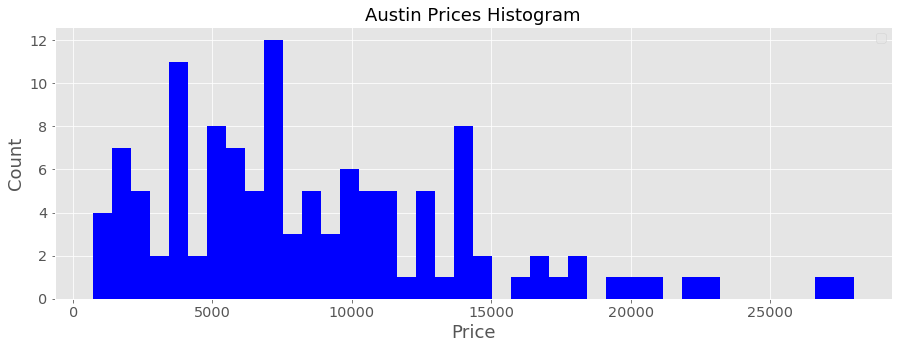

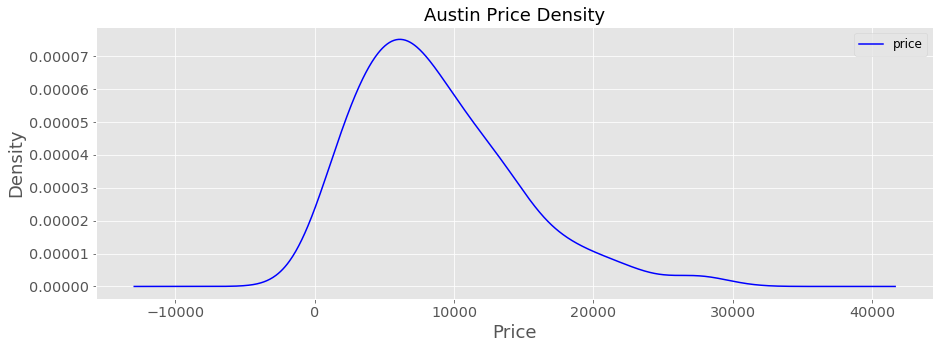

In [176]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(price, color = 'blue', bins = 40)
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Austin Prices Histogram", fontsize=18);
plt.show()

price=a_moto2['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Austin Price Density", fontsize=18);
plt.show()

plt.xlabel("Neighborhood");
plt.xticks(rotation=75)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood - Boxplots");

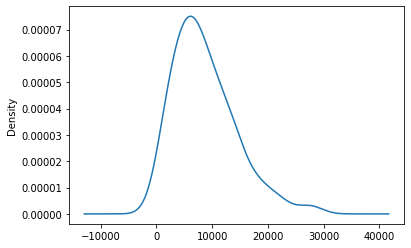